# Loan Prediction Analysis using Python


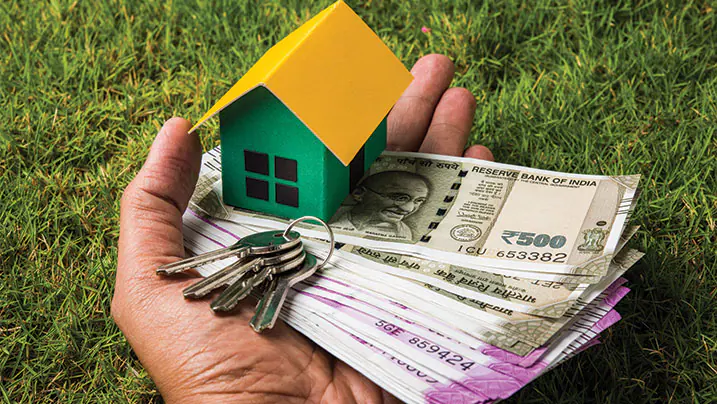

In [5]:
# #Loan Prediction using Machine learning
# # Loan Prediction is an essential problem in the banks and finance industries. 
# Accurately prediction whether a loans will be approved or rejected can help financial institutions to manage risk, reduce defaults,
# and increase profitability

# Project Objective
Loan Prediction using Machine Learning
Loan Prediction is an essential problem in the banks and finance industries. 
Accurately prediction whether a loans will be approved or rejected can help financial institutions to manage risk, reduce defaults, and increase profitability

**Algorithms Used**:
- Logistic Regression
- Naive Bayes
- Support Vector Machine (Linear)
- K-Nearest Neighbors
- Decision Tree
- Random Forest
- XGBoost
- Artificial Neural Network (1 Hidden Layer, Keras)

# Step 1 : Import Modules

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

print('All modules imported successfully')

All modules imported successfully


# Step 2 : Loading Data

In [7]:
df = pd.read_csv(r'C:\Users\chana\Downloads\train.csv')
print('donee')

donee


# Step 3 : Understanding data using EDA

### Step 3.1 : Data Head

In [8]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Step 3.2 : Data Tail

In [9]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


### Step 3.3 : Data Shape

In [10]:
df.shape

(614, 13)

### Step 3.4 : Data Info 

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


### Step 3.5 : Columns

In [12]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

### Step 3.6 : Column description

- **loan_id** : Unique identifier for each loan application  
- **no_of_dependents** : Number of dependents  
- **education** : Education level of applicant (Graduate / Not Graduate)  
- **self_employed** : Employment status (Yes = Self-employed, No = Salaried/Other)  
- **income_annum** : Annual income of the applicant (in currency units)  
- **loan_amount** : Loan amount requested by the applicant  
- **loan_term** : Duration of loan repayment (in years or months depending on dataset definition)  
- **cibil_score** : Credit score of the applicant (higher = better creditworthiness)  
- **residential_assets_value** : Value of residential property owned by applicant  
- **commercial_assets_value** : Value of commercial property owned by applicant  
- **luxury_assets_value** : Value of luxury assets (car, jewelry, etc.) owned by applicant  
- **bank_asset_value** : Value of assets/savings held in bank  
- **loan_status** : Loan approval status (Approved / Rejected → Target variable for prediction)  


### Step 3.7 : Checking Null Points

In [13]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### Step 3.8 : Column Stats

In [14]:
df.describe().round(2)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.00,614.00,592.00,600.00,564.00
mean,5403.46,1621.25,146.41,342.00,0.84
std,6109.04,2926.25,85.59,65.12,0.36
min,150.00,0.00,9.00,12.00,0.00
25%,2877.50,0.00,100.00,360.00,1.00
50%,3812.50,1188.50,128.00,360.00,1.00
75%,5795.00,2297.25,168.00,360.00,1.00
max,81000.00,41667.00,700.00,480.00,1.00


### Step 3.9 : Each Column Univariate Analysis

In [15]:
for i in df:
    print(f'column_{i}', df[i].unique())
    print('======================', end = '\n\n')

column_Loan_ID ['LP001002' 'LP001003' 'LP001005' 'LP001006' 'LP001008' 'LP001011'
 'LP001013' 'LP001014' 'LP001018' 'LP001020' 'LP001024' 'LP001027'
 'LP001028' 'LP001029' 'LP001030' 'LP001032' 'LP001034' 'LP001036'
 'LP001038' 'LP001041' 'LP001043' 'LP001046' 'LP001047' 'LP001050'
 'LP001052' 'LP001066' 'LP001068' 'LP001073' 'LP001086' 'LP001087'
 'LP001091' 'LP001095' 'LP001097' 'LP001098' 'LP001100' 'LP001106'
 'LP001109' 'LP001112' 'LP001114' 'LP001116' 'LP001119' 'LP001120'
 'LP001123' 'LP001131' 'LP001136' 'LP001137' 'LP001138' 'LP001144'
 'LP001146' 'LP001151' 'LP001155' 'LP001157' 'LP001164' 'LP001179'
 'LP001186' 'LP001194' 'LP001195' 'LP001197' 'LP001198' 'LP001199'
 'LP001205' 'LP001206' 'LP001207' 'LP001213' 'LP001222' 'LP001225'
 'LP001228' 'LP001233' 'LP001238' 'LP001241' 'LP001243' 'LP001245'
 'LP001248' 'LP001250' 'LP001253' 'LP001255' 'LP001256' 'LP001259'
 'LP001263' 'LP001264' 'LP001265' 'LP001266' 'LP001267' 'LP001273'
 'LP001275' 'LP001279' 'LP001280' 'LP001282' 'L

### Step 3.10 : Each Numerical Features Hist Plot Distribution

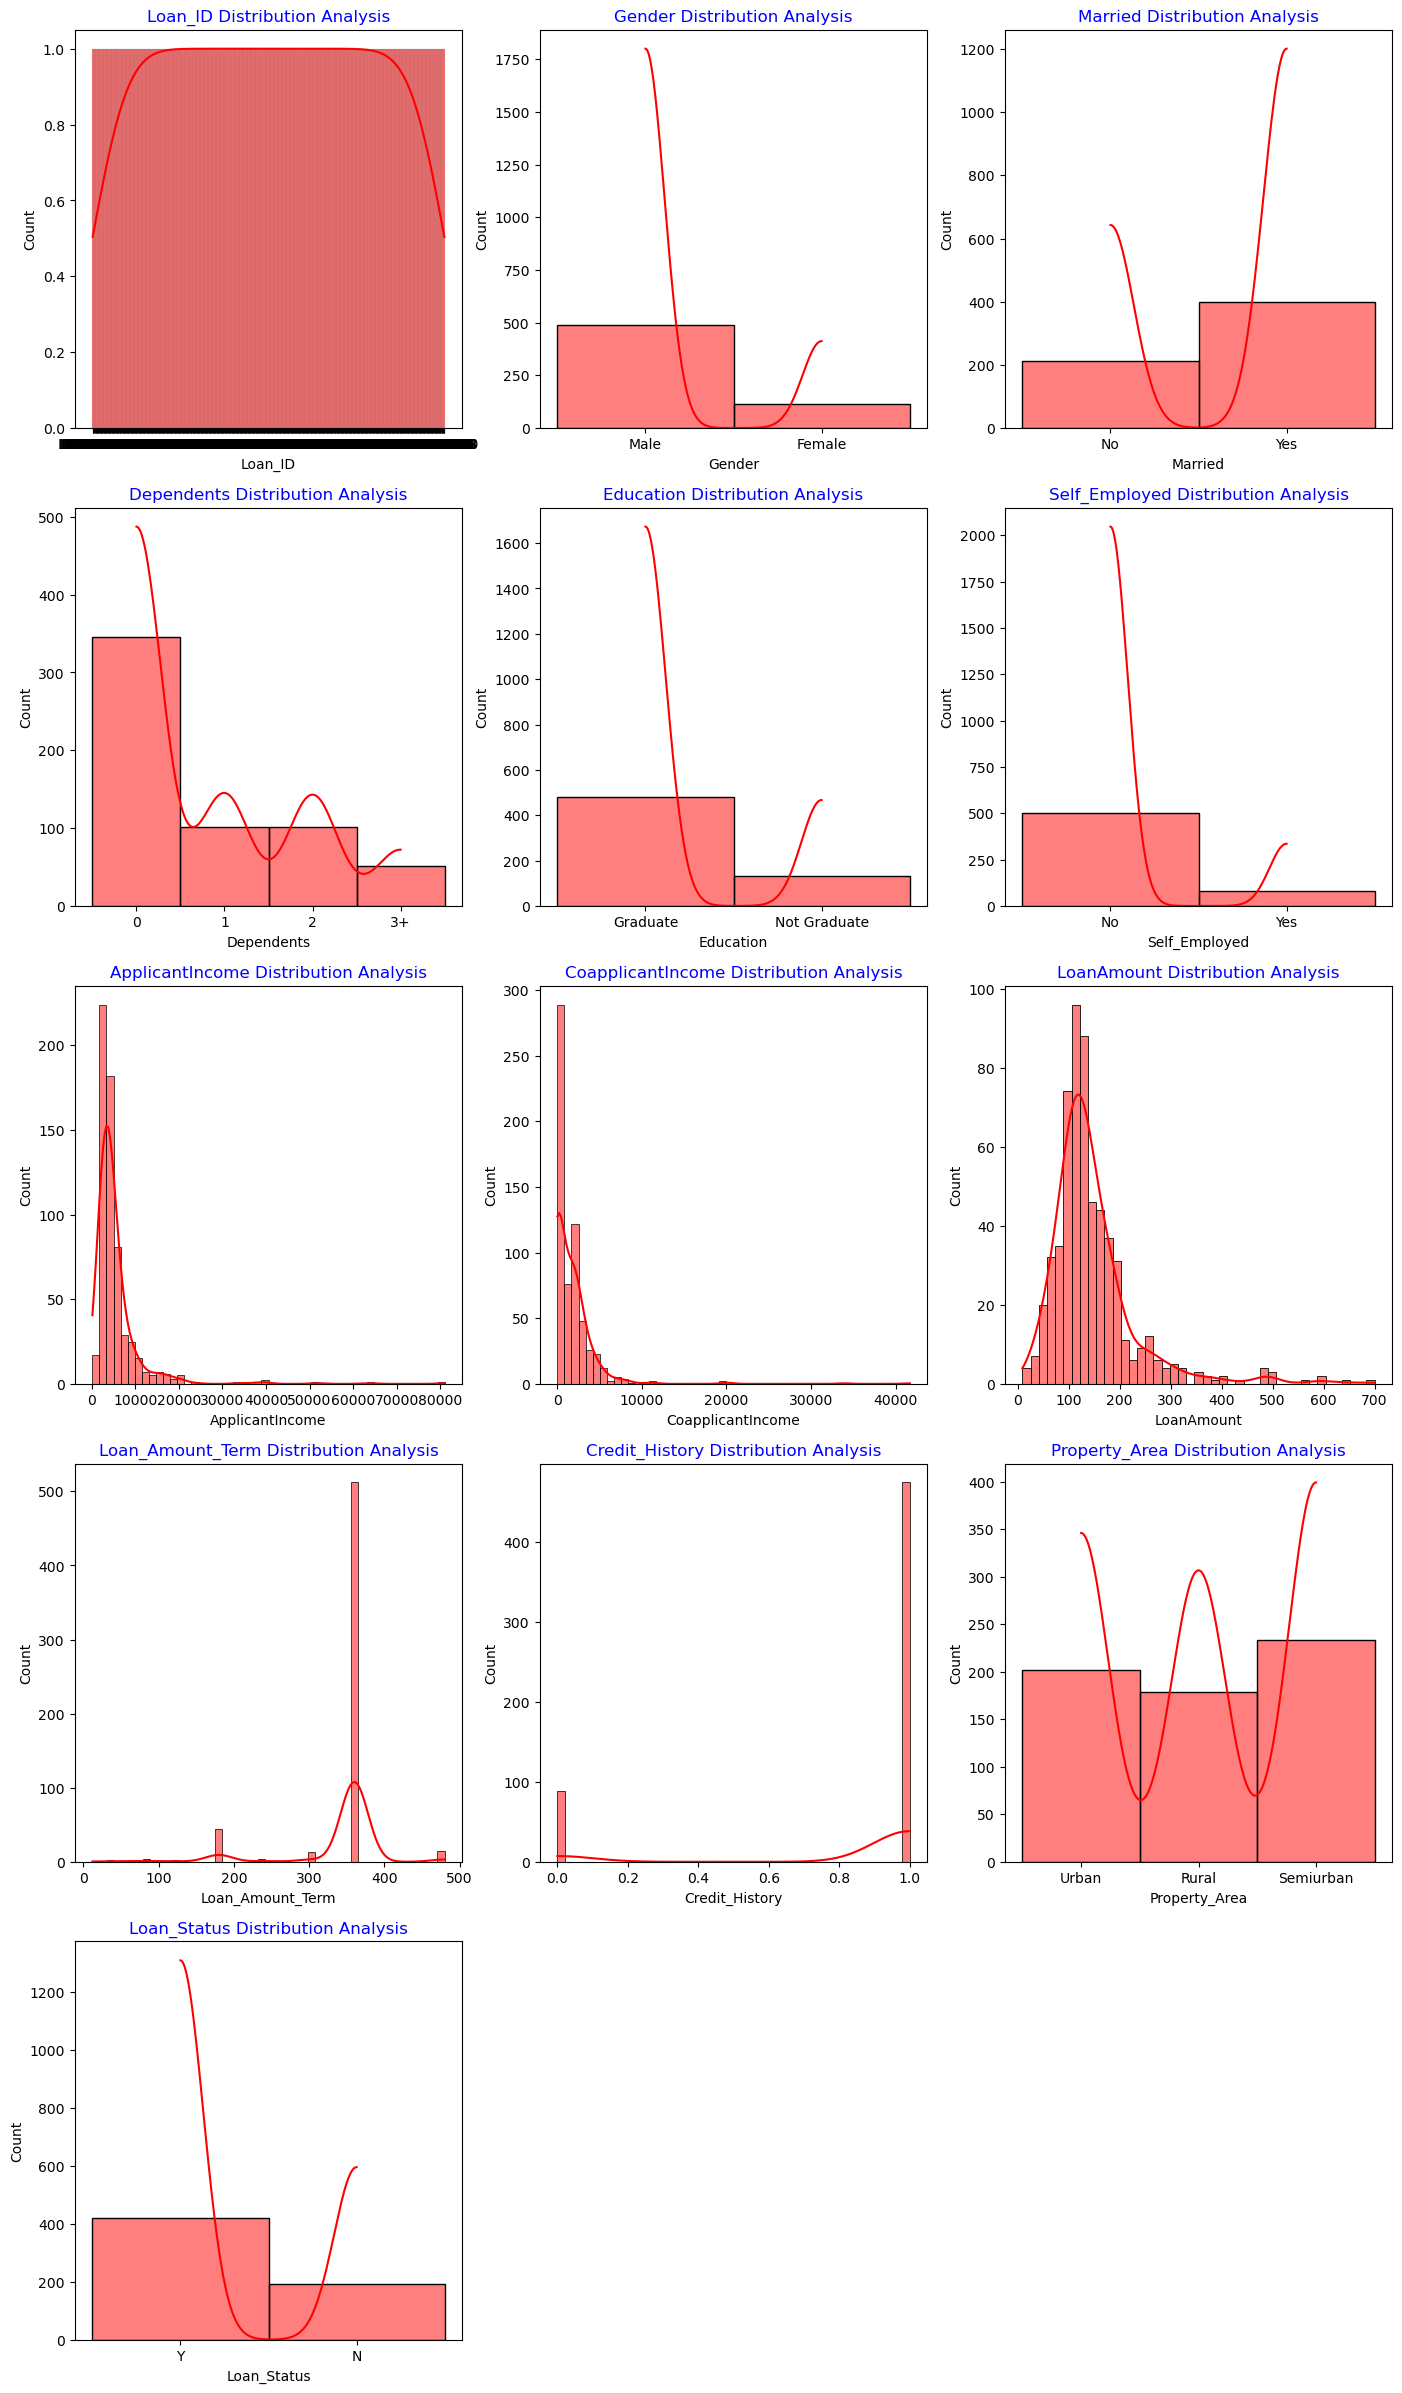

In [16]:
r = 5
c = 3
plt.figure(figsize=(17,30))
for i,j in enumerate(df):
    plt.subplot(r,c,i+1)
    plt.title(f'{j} Distribution Analysis',color = 'Blue')
    sns.histplot(df[j], kde = True, color = 'r')

plt.savefig('DakshI.jpeg', dpi = 500)
plt.show()

### Step 3.11 : Bivariate Analysis, To check Correlation of features vs target

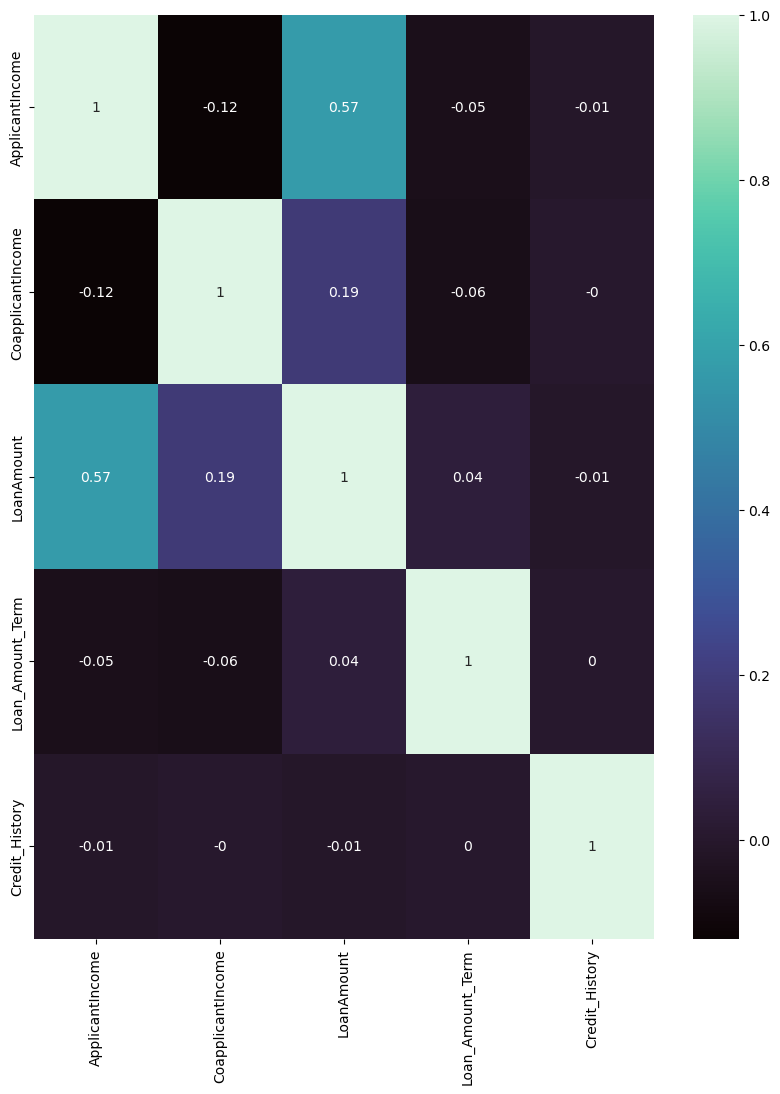

In [17]:
plt.figure(figsize=(10,12))
sns.heatmap(df.select_dtypes(include=['number']).corr().round(2), cmap='mako', annot=True)
plt.show()
#Graduation column has non numerical values in it. That's why we have to select only the numerical ones for coorelation to work

# Step 4 : Divide Data into train and test

### Step 4.1 Splitting Training Data

In [18]:
# 4.1 Divide data into Target and Features

X = df.iloc[:,:-1]
y = df.iloc[:, -1]

In [19]:
X

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban


In [20]:
y

0      Y
1      N
2      Y
3      Y
4      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 614, dtype: object

In [21]:
X.shape, y.shape

((614, 12), (614,))

### Step 4.2 Train-test Split

In [22]:

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [23]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(491, 12)
(123, 12)
(491,)
(123,)


In [24]:
X_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
83,LP001273,Male,Yes,0,Graduate,No,6000,2250.0,265.0,360.0,NaN,Semiurban
90,LP001316,Male,Yes,0,Graduate,No,2958,2900.0,131.0,360.0,1.0,Semiurban
227,LP001758,Male,Yes,2,Graduate,No,6250,1695.0,210.0,360.0,1.0,Semiurban
482,LP002537,Male,Yes,0,Graduate,No,2083,3150.0,128.0,360.0,1.0,Semiurban
464,LP002493,Male,No,0,Graduate,No,4166,0.0,98.0,360.0,0.0,Semiurban
...,...,...,...,...,...,...,...,...,...,...,...,...
71,LP001245,Male,Yes,2,Not Graduate,Yes,1875,1875.0,97.0,360.0,1.0,Semiurban
106,LP001369,Male,Yes,2,Graduate,No,11417,1126.0,225.0,360.0,1.0,Urban
270,LP001888,Female,No,0,Graduate,No,3237,0.0,30.0,360.0,1.0,Urban
435,LP002393,Female,NaN,NaN,Graduate,No,10047,0.0,NaN,240.0,1.0,Semiurban


### Step 4.3 : Encoding Data

In [25]:
# Encoding categorical data
# Encoding the Independent Variable
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()

In [26]:
for i in range(0, 5):
    X_train.iloc[:, i] = labelencoder_X.fit_transform(X_train.iloc[:, i])

X_train.iloc[:, 10] = labelencoder_X.fit_transform(X_train.iloc[:, 10])

In [27]:
# Encoding the Dependent Variable
labelencoder_y = LabelEncoder()
y_train = labelencoder_y.fit_transform(y_train)

In [28]:
X_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
83,62,1,1,0,0,No,6000,2250.0,265.0,360.0,2.0,Semiurban
90,68,1,1,0,0,No,2958,2900.0,131.0,360.0,1.0,Semiurban
227,176,1,1,2,0,No,6250,1695.0,210.0,360.0,1.0,Semiurban
482,382,1,1,0,0,No,2083,3150.0,128.0,360.0,1.0,Semiurban
464,367,1,0,0,0,No,4166,0.0,98.0,360.0,0.0,Semiurban
...,...,...,...,...,...,...,...,...,...,...,...,...
71,57,1,1,2,1,Yes,1875,1875.0,97.0,360.0,1.0,Semiurban
106,82,1,1,2,0,No,11417,1126.0,225.0,360.0,1.0,Urban
270,210,0,0,0,0,No,3237,0.0,30.0,360.0,1.0,Urban
435,345,0,2,4,0,No,10047,0.0,NaN,240.0,1.0,Semiurban


In [29]:
y_train

array([0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,

In [30]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

labelencoder_X = LabelEncoder()
for i in range(0, 5):
    X_test.iloc[:, i] = labelencoder_X.fit_transform(X_test.iloc[:, i])

X_test.iloc[:, 10] = labelencoder_X.fit_transform(X_test.iloc[:, 10])

# Encoding the Dependent Variable
labelencoder_y = LabelEncoder()
y_test = labelencoder_y.fit_transform(y_test)

In [31]:
X_test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
350,75,1,1,0,0,No,9083,0.0,228.0,360.0,1.0,Semiurban
377,80,1,1,0,0,No,4310,0.0,130.0,360.0,2.0,Semiurban
163,37,1,1,2,0,No,4167,1447.0,158.0,360.0,1.0,Rural
609,121,0,0,0,0,No,2900,0.0,71.0,360.0,1.0,Rural
132,28,1,0,0,0,No,2718,0.0,70.0,360.0,1.0,Semiurban
...,...,...,...,...,...,...,...,...,...,...,...,...
231,52,1,1,0,0,NaN,3716,0.0,42.0,180.0,1.0,Rural
312,68,0,0,0,0,No,2507,0.0,56.0,360.0,1.0,Rural
248,56,1,1,1,0,No,2882,1843.0,123.0,480.0,1.0,Semiurban
11,3,1,1,2,0,NaN,2500,1840.0,109.0,360.0,1.0,Urban


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [33]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

# Identify categorical & numeric columns
categorical_cols = X_train.select_dtypes(include=['object']).columns
numeric_cols = X_train.select_dtypes(exclude=['object']).columns

# Preprocessor: impute missing values, then scale/encode
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),   # fill NaN in numeric with mean
            ('scaler', StandardScaler())
        ]), numeric_cols),

        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),  # fill NaN in categorical with mode
            ('encoder', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_cols)
    ]
)

# Create pipeline with preprocessing + PCA
pca_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=2))
])

# Fit on training data
X_train_pca = pca_pipeline.fit_transform(X_train)

# Transform test data (don’t refit!)
X_test_pca = pca_pipeline.transform(X_test)

# Explained variance
explained_variance = pca_pipeline.named_steps['pca'].explained_variance_ratio_
print("Explained variance ratio:", explained_variance)


Explained variance ratio: [0.18666861 0.13279281]


# Step 5 : Multi-Model Creation

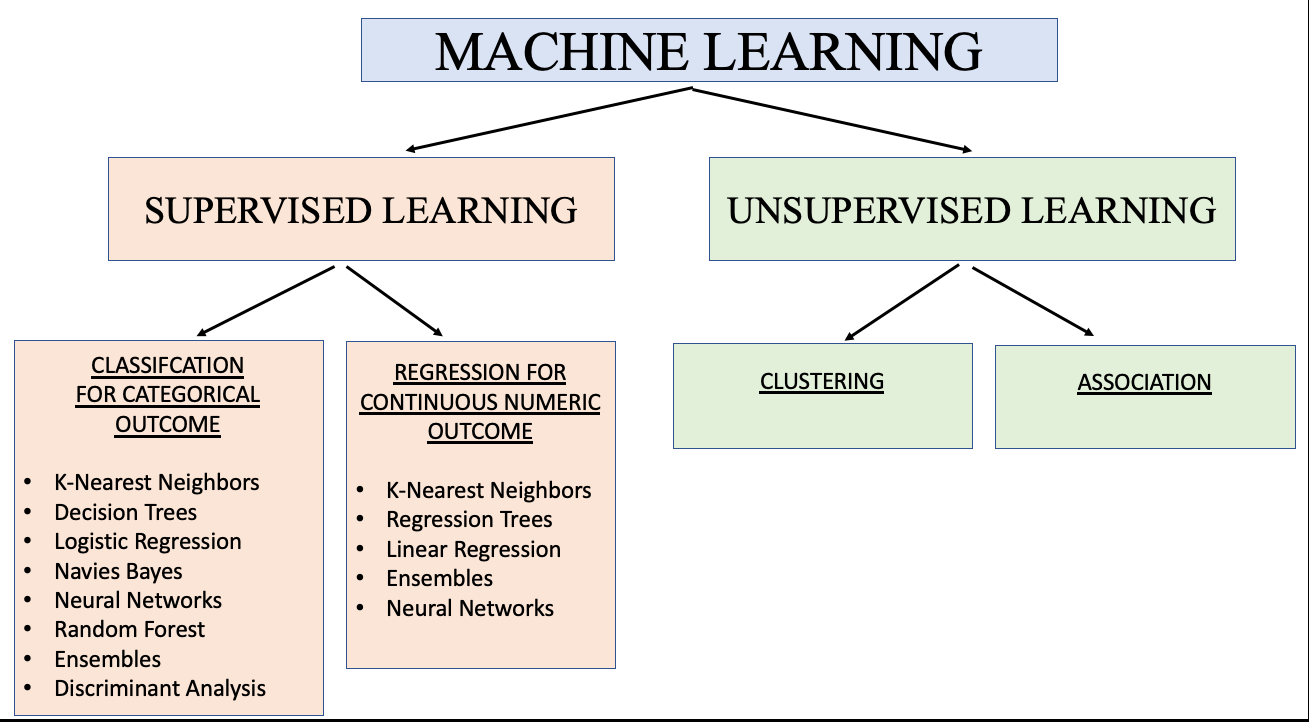

### Step 5.1 Logistic Regression Model

### Step 5.1.1 Importing Regression Model

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression

# Categorical & numeric columns
categorical_cols = X_train.select_dtypes(include=['object']).columns
numeric_cols = X_train.select_dtypes(exclude=['object']).columns

# Preprocessing for numeric data: impute + passthrough
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])

# Preprocessing for categorical data: impute + one-hot encode
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine into a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

# Final pipeline
model_lr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

# Train model
model_lr.fit(X_train, y_train)

# Predict
y_pred = model_lr.predict(X_test)


In [35]:
# Predicting the Test set results
y_pred = model_lr.predict(X_test)

In [36]:
y_pred

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y'], dtype=object)

### 5.1.2: Import model evaluation metrices

In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

### 5.1.3: Import Confusion Matrix to Evaluate classificationModel

In [38]:
from sklearn.metrics import confusion_matrix

In [39]:
cm = confusion_matrix(y_test,y_pred)

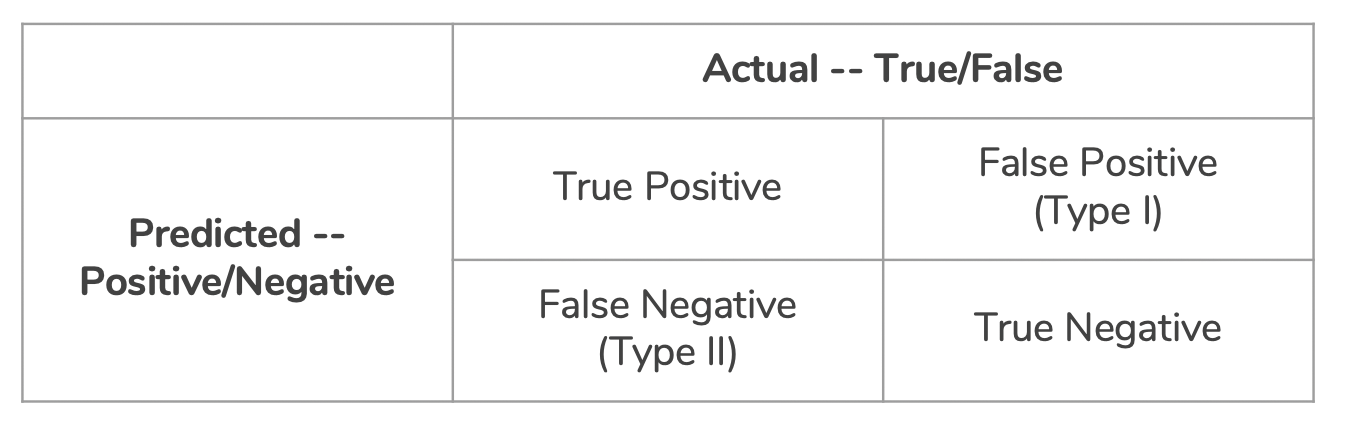

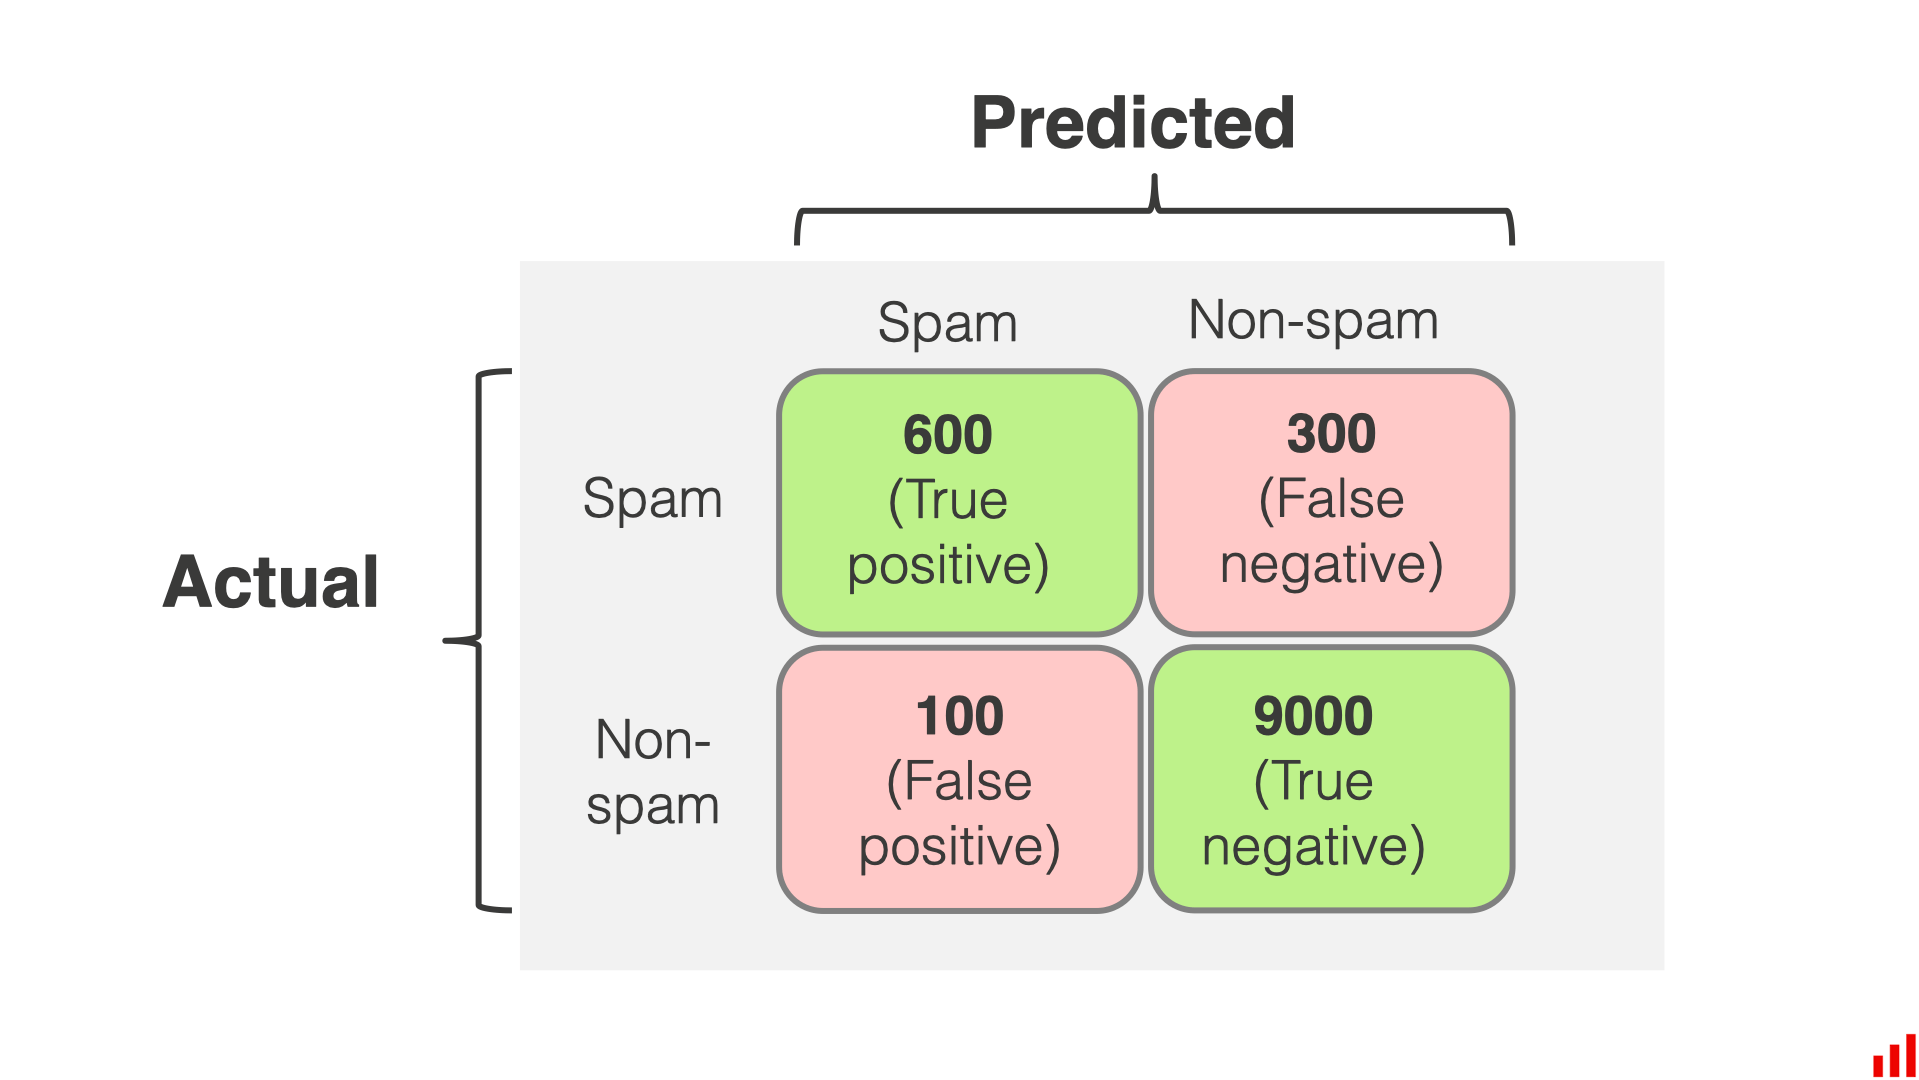

In [40]:
print(cm)

[[18 25]
 [ 1 79]]


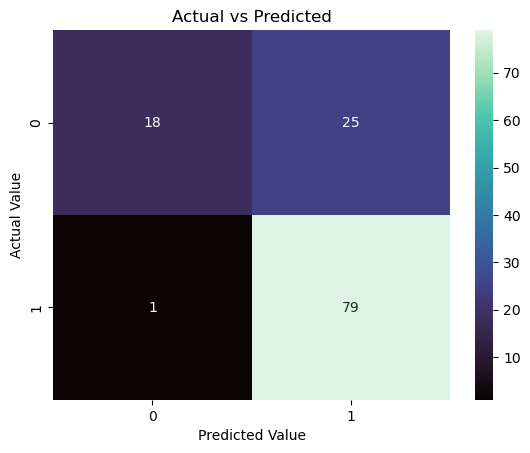

In [41]:
plt.title('Actual vs Predicted')
sns.heatmap(cm,annot = True,cmap='mako')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()

In [42]:
cm

array([[18, 25],
       [ 1, 79]])

In [43]:
cm.ravel()

array([18, 25,  1, 79])

In [46]:
TN,FP,FN,TP = cm.ravel()

In [47]:
ps = TP/(TP+FP)
ps

np.float64(0.7596153846153846)

In [48]:
acs = (TN + TP)/cm.sum()
acs

np.float64(0.7886178861788617)

In [49]:
print('The accuracy of Logistic Regression is: ', accuracy_score(y_pred, y_test))

The accuracy of Logistic Regression is:  0.7886178861788617


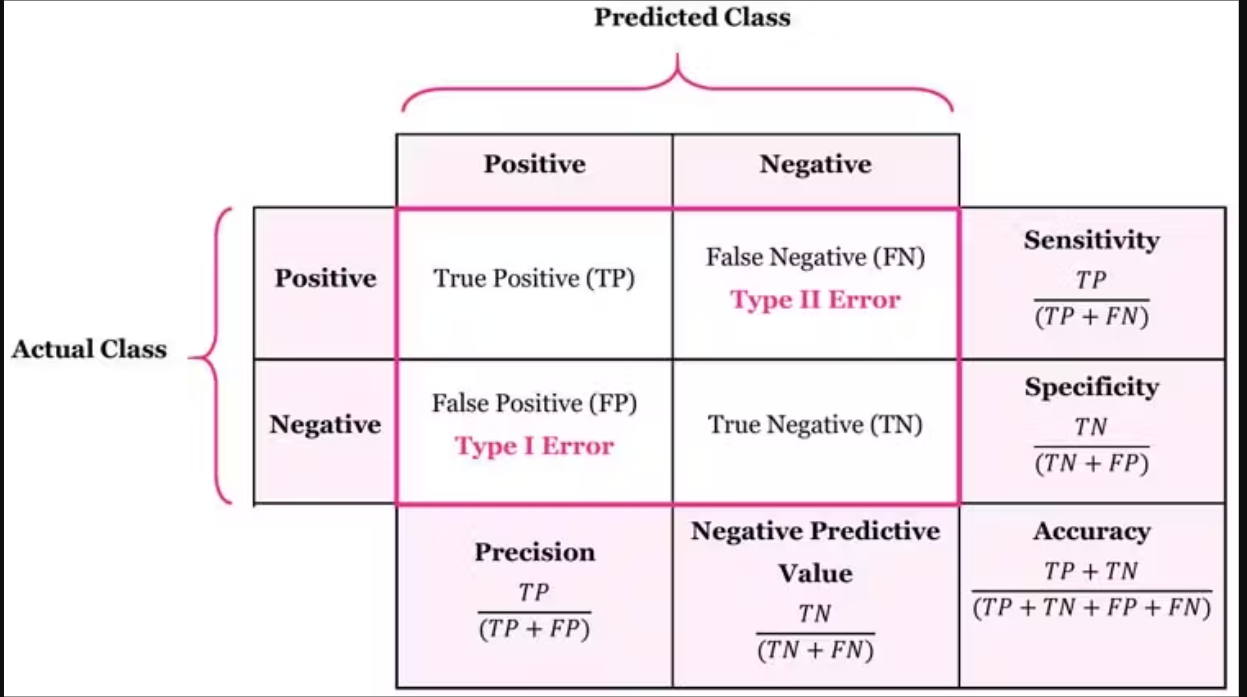

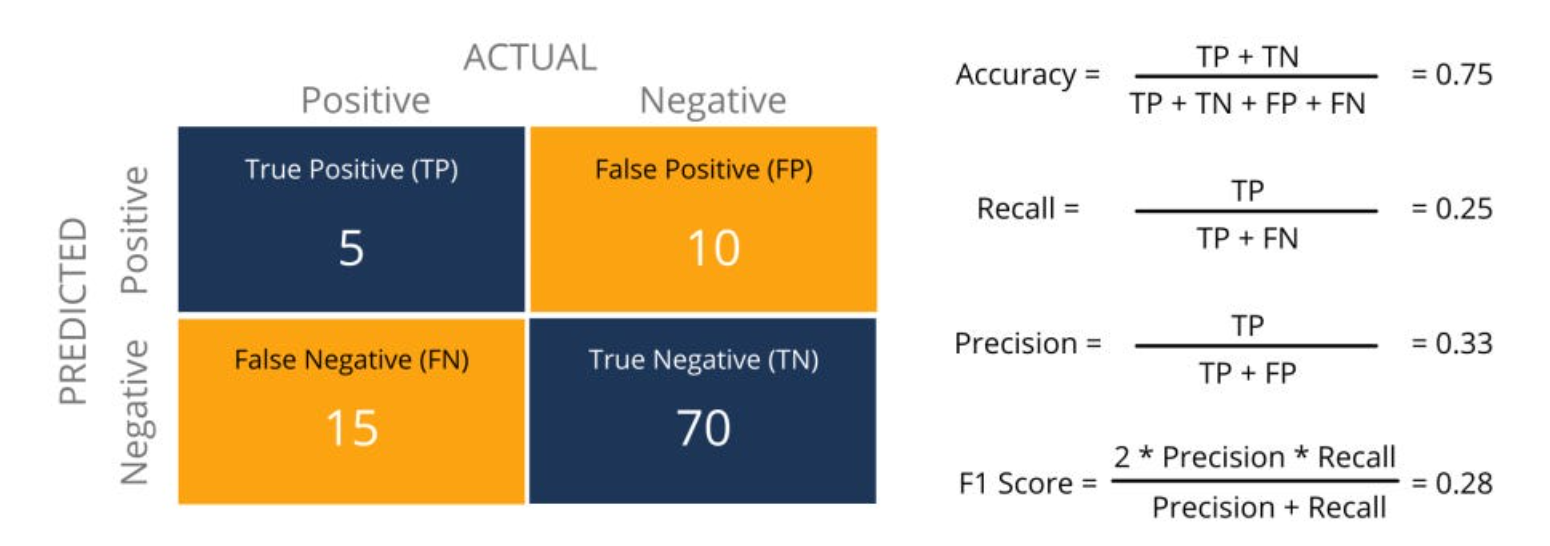

In [50]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, classification_report

# 1. Drop ID column if present
X_train = X_train.drop(columns=['Loan_ID'], errors='ignore')
X_test  = X_test.drop(columns=['Loan_ID'], errors='ignore')

# 2. Encode target labels (Y/N → 1/0)
y_train = y_train.map({'N': 0, 'Y': 1})
y_test  = y_test.map({'N': 0, 'Y': 1})

# 3. Identify categorical & numeric columns
categorical_cols = X_train.select_dtypes(include=['object']).columns
numeric_cols = X_train.select_dtypes(exclude=['object']).columns

# 4. Transformers
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# 5. Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

# 6. Model Pipeline
model_lr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

# 7. Train
model_lr.fit(X_train, y_train)

# 8. Predict
y_pred = model_lr.predict(X_test)

# 9. Evaluation
rs = recall_score(y_test, y_pred)
print("Recall Score is:", rs)

print("\nClassification Report:\n", classification_report(y_test, y_pred))


Recall Score is: 0.9875

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



In [51]:
# F1 Score to Evaluate both Precision and Recall Score

In [52]:
f1_sc = f1_score(y_test,y_pred)

In [53]:
print('F1 Score: ',f1_sc)

F1 Score:  0.8586956521739131


In [54]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



### Step 5.1.4 : Checking Model Score

In [55]:
# Accuracy score from logistic regression pipeline
lr_score = model_lr.score(X_test, y_test)
print("Accuracy Score is:", lr_score)


Accuracy Score is: 0.7886178861788617


### Step 5.1.5 : Visualizing Training and Test set Results

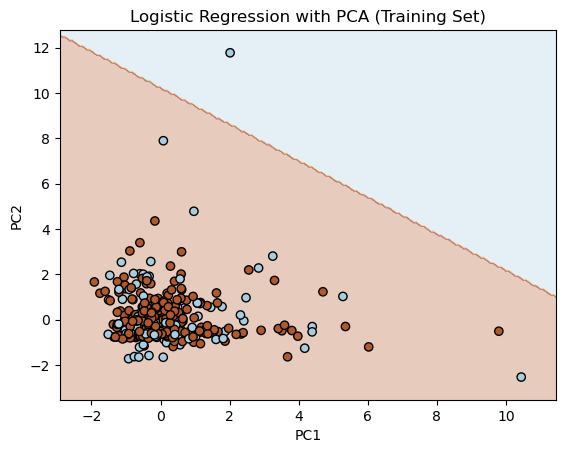

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Separate categorical and numeric features
categorical_features = X_train.select_dtypes(include=['object']).columns
numeric_features = X_train.select_dtypes(exclude=['object']).columns

# Preprocessing pipeline
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),     # handle NaNs
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # handle NaNs
    ('onehot', OneHotEncoder(drop='first'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Full pipeline with PCA + Logistic Regression
model_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('pca', PCA(n_components=2)),
    ('logreg', LogisticRegression())
])

# Train pipeline
model_pipeline.fit(X_train, y_train)

# Transform training set into PCA space for visualization
X_train_pca = model_pipeline.named_steps['pca'].transform(
    model_pipeline.named_steps['preprocess'].transform(X_train)
)

# Plot decision boundary
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

Z = model_pipeline.named_steps['logreg'].predict(
    np.c_[xx.ravel(), yy.ravel()]
)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.Paired, edgecolors='k')
plt.title("Logistic Regression with PCA (Training Set)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


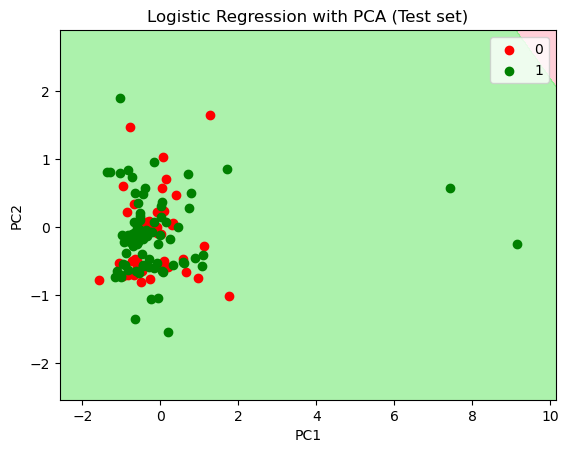

In [57]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt

# ✅ Transform X_test into PCA space (2D array)
X_test_pca = model_pipeline.named_steps['pca'].transform(
    model_pipeline.named_steps['preprocess'].transform(X_test)
)

# Ensure y is numpy array
y_set = y_test.values if hasattr(y_test, "values") else y_test

# ✅ Meshgrid for 2D decision boundary
X1, X2 = np.meshgrid(
    np.arange(start=X_test_pca[:, 0].min() - 1, stop=X_test_pca[:, 0].max() + 1, step=0.01),
    np.arange(start=X_test_pca[:, 1].min() - 1, stop=X_test_pca[:, 1].max() + 1, step=0.01)
)

# Predict boundary in PCA space
Z = model_pipeline.named_steps['logreg'].predict(
    np.array([X1.ravel(), X2.ravel()]).T
).reshape(X1.shape)

# ✅ Plot decision boundary
plt.contourf(X1, X2, Z, alpha=0.75, cmap=ListedColormap(('pink', 'lightgreen')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# ✅ Scatter actual test points in PCA space
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_test_pca[y_set == j, 0], X_test_pca[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)

plt.title('Logistic Regression with PCA (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()


### Step 5.2 : Naive Bayes Model

In [59]:
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline

# Naive Bayes pipeline (with preprocessing + PCA)
nb_pipeline = Pipeline(steps=[
    ('preprocess', preprocessor),  # handles categorical + numeric
    ('nb', GaussianNB())           # Naive Bayes classifier
])

# Fit on training set
nb_pipeline.fit(X_train, y_train)

# Predictions
y_pred_nb = nb_pipeline.predict(X_test)

# Evaluation
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Recall:", recall_score(y_test, y_pred_nb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_nb))


Accuracy: 0.7804878048780488
Recall: 0.975

Confusion Matrix:
 [[18 25]
 [ 2 78]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.42      0.57        43
           1       0.76      0.97      0.85        80

    accuracy                           0.78       123
   macro avg       0.83      0.70      0.71       123
weighted avg       0.81      0.78      0.75       123



In [60]:
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# Identify categorical & numeric columns
categorical_cols = X_train.select_dtypes(include=['object']).columns
numeric_cols = X_train.select_dtypes(exclude=['object']).columns

# Preprocessing: impute + encode/scale
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
        ]), categorical_cols),
        
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), numeric_cols)
    ]
)

# Pipeline with preprocessing + model
model_nb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GaussianNB())
])

# Fit model
model_nb.fit(X_train, y_train)

# Predict
y_pred = model_nb.predict(X_test)

# Score
score = model_nb.score(X_test, y_test)
print("Naive Bayes Accuracy:", score)


Naive Bayes Accuracy: 0.7804878048780488


In [61]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0])

In [63]:
nv_score = model_nb.score(X_test,y_test)
print('Naive Bayes Score:',nv_score)

Naive Bayes Score: 0.7804878048780488


In [64]:
print('Accuracy Score: ',accuracy_score(y_test,y_pred))
print('Precision Score: ',precision_score(y_test,y_pred))
print('Recall Score: ',recall_score(y_test,y_pred))
print('F1 Score: ',f1_score(y_test,y_pred))


Accuracy Score:  0.7804878048780488
Precision Score:  0.7572815533980582
Recall Score:  0.975
F1 Score:  0.8524590163934426


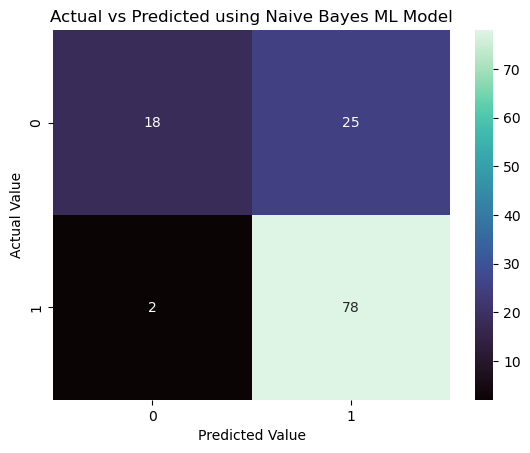

In [65]:
cm = confusion_matrix(y_test,y_pred)

plt.title('Actual vs Predicted using Naive Bayes ML Model')
sns.heatmap(cm,annot = True,cmap='mako')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()

In [66]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.42      0.57        43
           1       0.76      0.97      0.85        80

    accuracy                           0.78       123
   macro avg       0.83      0.70      0.71       123
weighted avg       0.81      0.78      0.75       123



### Step 5.3 : SVM

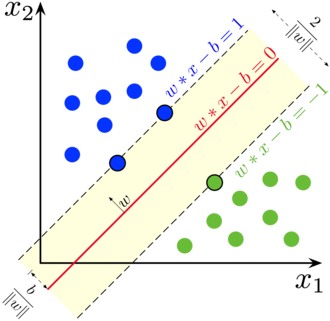

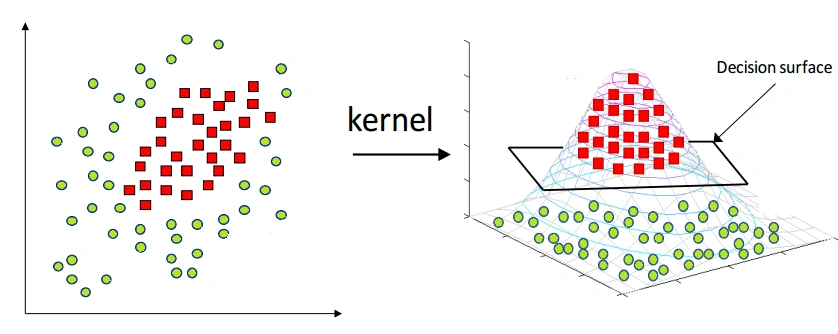

In [68]:
# SVM Works on Support vectos of nearest data points of different classes
# It will create line, plane or Hyperplane
# we can use this for both regression problems and classification(Binary/Multiclass)

In [72]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC

pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),  # fill NaN
    ("svc", SVC())
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('imputer', SimpleImputer()), ('svc', SVC())])

In [77]:
X = X.isna()

In [79]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC

pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),  # handle NaN
    ("svc", SVC())
])

# Train
pipeline.fit(X_train, y_train)

# Predict (no need to preprocess X_test manually)
y_pred = pipeline.predict(X_test)

In [80]:
print('Accuracy Score: ',accuracy_score(y_test,y_pred))
print('Precision Score: ',precision_score(y_test,y_pred))
print('Recall Score: ',recall_score(y_test,y_pred))
print('F1 Score: ',f1_score(y_test,y_pred))


Accuracy Score:  0.6504065040650406
Precision Score:  0.6504065040650406
Recall Score:  1.0
F1 Score:  0.7881773399014779


In [81]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        43
           1       0.65      1.00      0.79        80

    accuracy                           0.65       123
   macro avg       0.33      0.50      0.39       123
weighted avg       0.42      0.65      0.51       123



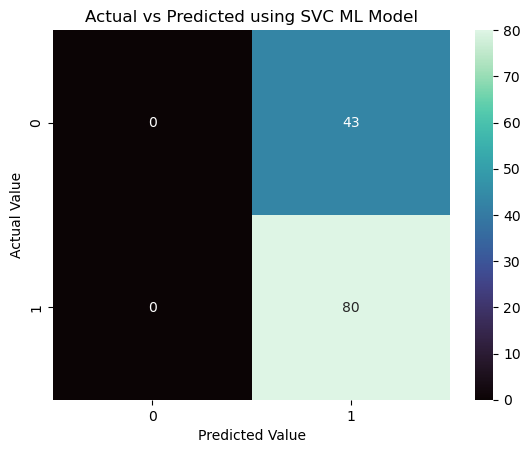

In [82]:
cm = confusion_matrix(y_test,y_pred)

plt.title('Actual vs Predicted using SVC ML Model')
sns.heatmap(cm,annot = True,cmap='mako')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()

In [83]:
svm_score = accuracy_score(y_test,y_pred)

In [84]:
lr_score,nv_score,svm_score

(0.7886178861788617, 0.7804878048780488, 0.6504065040650406)

In [87]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC

pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),  # removes NaN
    ("svc", SVC())
])

pipeline.fit(X_train, y_train)

score = pipeline.score(X_test, y_test)
print("Accuracy:", score)

Accuracy: 0.6504065040650406


### Step 5.4 : Decision Tree Model

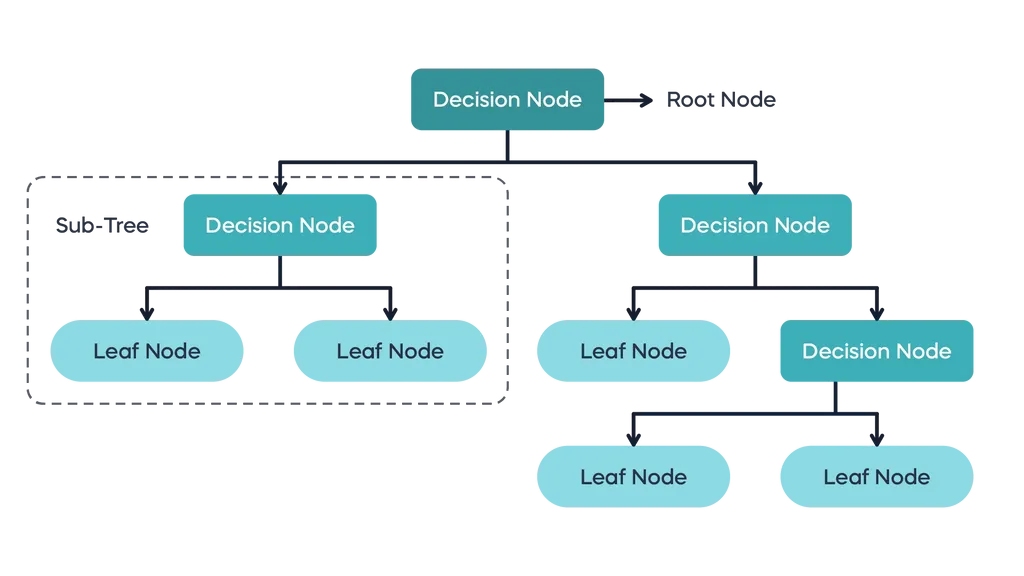

In [89]:
from sklearn.tree import DecisionTreeClassifier

In [90]:
model_dt = DecisionTreeClassifier()

model_dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [91]:
y_pred = model_dt.predict(X_test)

In [92]:
print('Accuracy Score: ',accuracy_score(y_test,y_pred))
print('Precision Score: ',precision_score(y_test,y_pred))
print('Recall Score: ',recall_score(y_test,y_pred))
print('F1 Score: ',f1_score(y_test,y_pred))

Accuracy Score:  0.6504065040650406
Precision Score:  0.7228915662650602
Recall Score:  0.75
F1 Score:  0.7361963190184049


In [93]:
dt_score = accuracy_score(y_test,y_pred)
dt_score

0.6504065040650406

### Step 5.5: Ensemble ML Model
- `Bagging Technique`: Bags of Multiple ML Model, and each model give it's prediction/classification, final outcome based on majority
- `Boosting Technique`: Next model learn from previous model and boost it minimize error to improve score

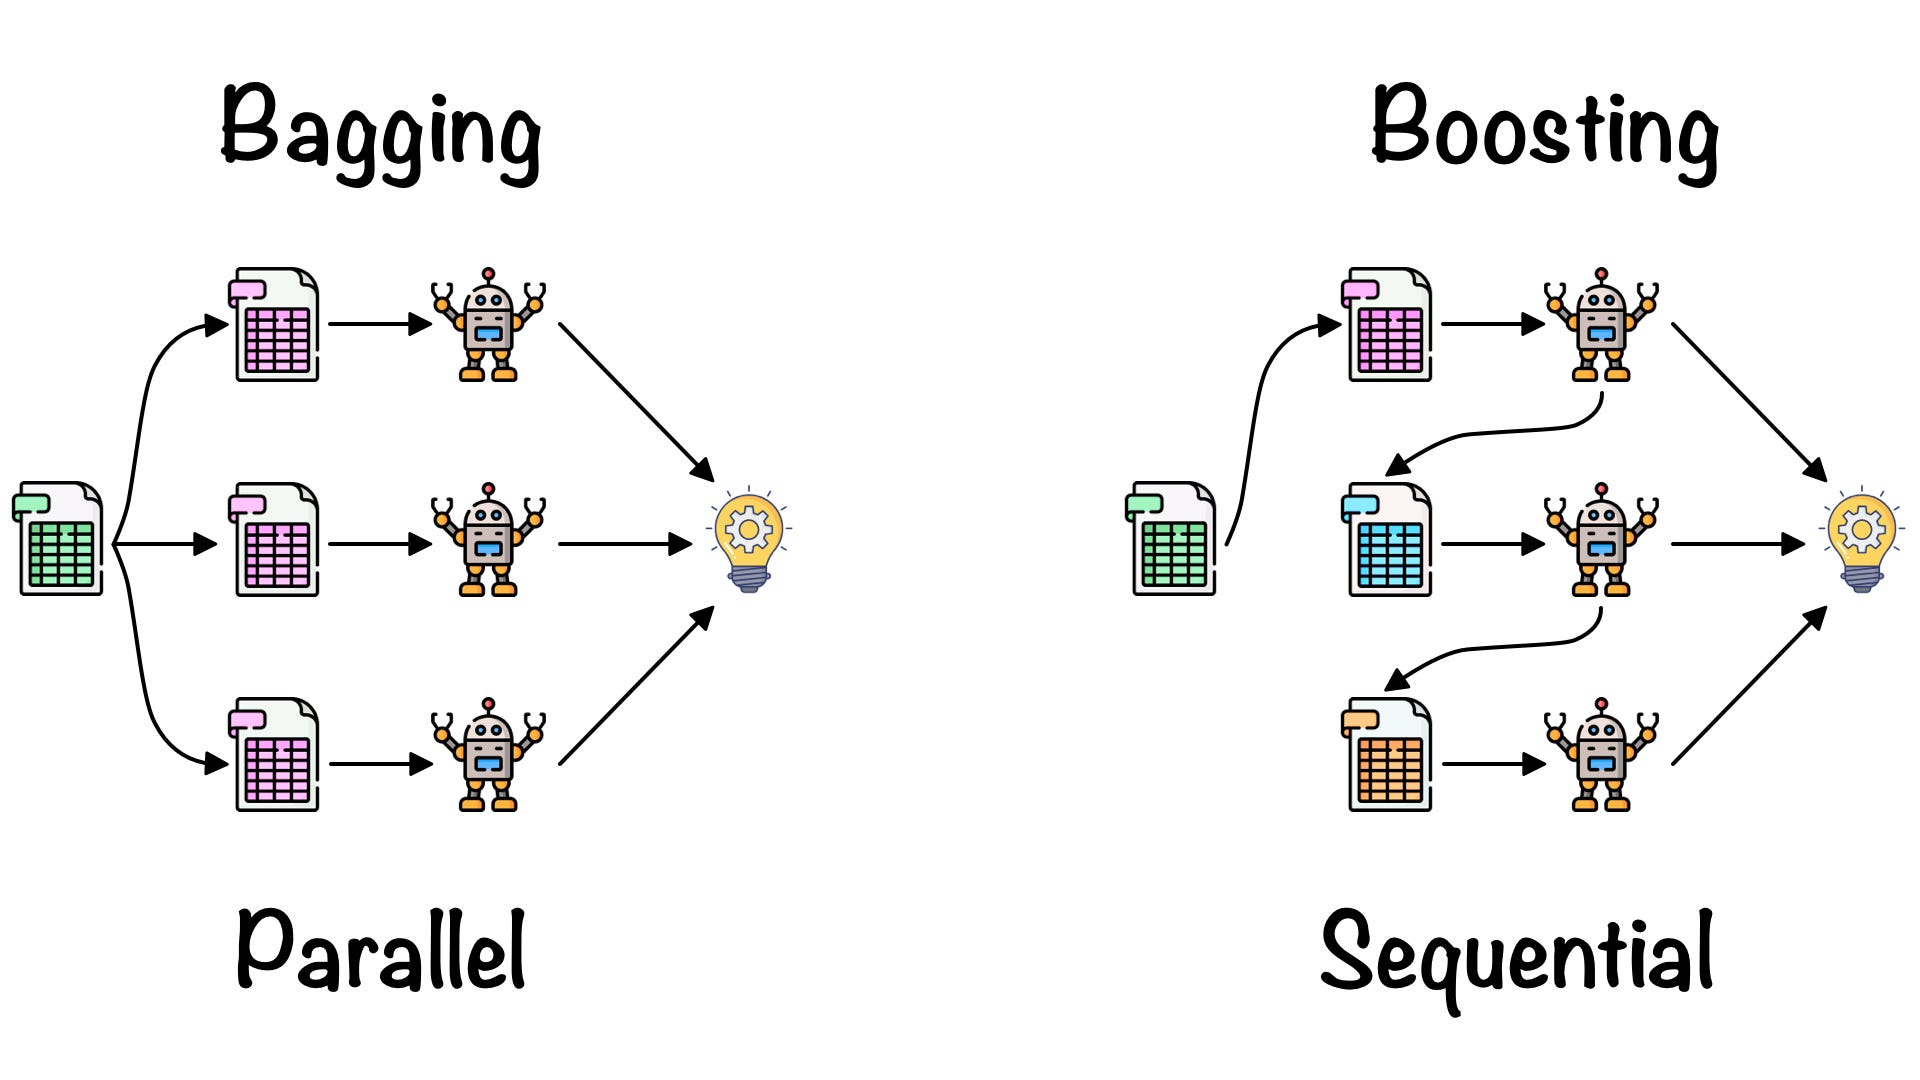

In [95]:
# Random Forest: Bags of Multiple Decision Trees Models
# Default Trees = 100
# Bagging technique( Ensemble)

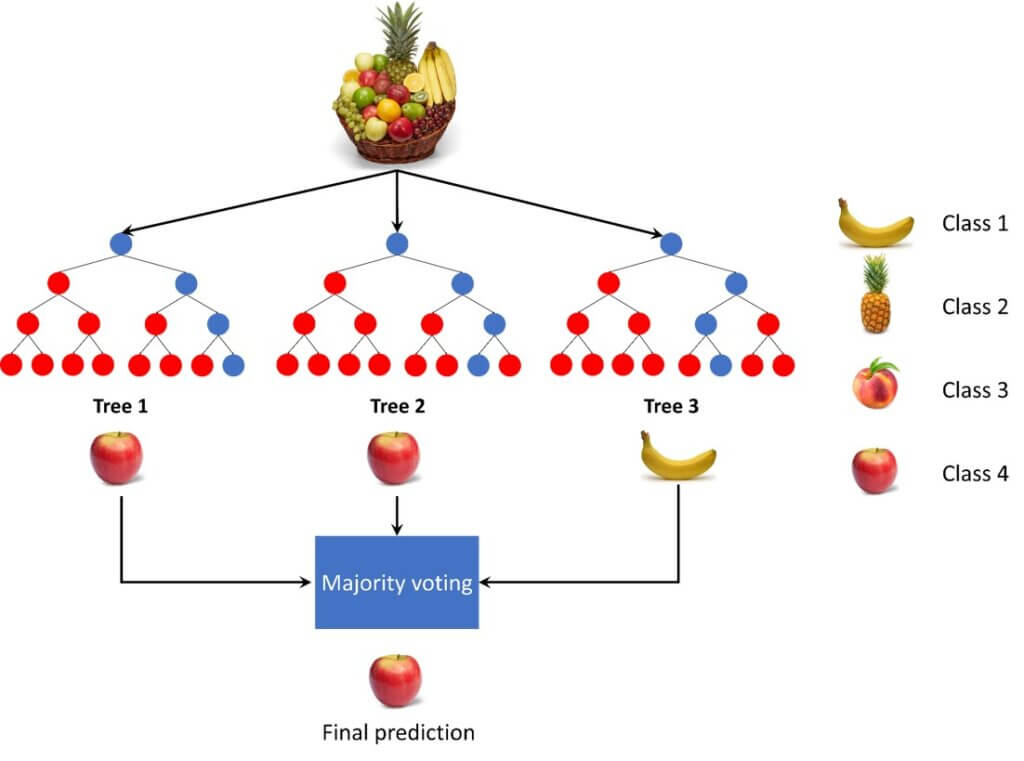

In [96]:
# Random Forest regression problem: Avg of Final value>> 2.2 + 2.4 + 2.5>> 2.36 
# Random Forest Classification>> Binary/Multiclass classification >> Majority Voting

In [97]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators = 200) # Parameter change Default Tree 100 to 200

model_rf.fit(X_train,y_train)  # Learning

RandomForestClassifier(n_estimators=200)

In [98]:
y_pred = model_rf.predict(X_test)

In [99]:
print('Accuracy Score: ',accuracy_score(y_test,y_pred))
print('Precision Score: ',precision_score(y_test,y_pred))
print('Recall Score: ',recall_score(y_test,y_pred))
print('F1 Score: ',f1_score(y_test,y_pred))

Accuracy Score:  0.7804878048780488
Precision Score:  0.7572815533980582
Recall Score:  0.975
F1 Score:  0.8524590163934426


In [100]:
rf_score = accuracy_score(y_test,y_pred)
rf_score

0.7804878048780488

In [101]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.42      0.57        43
           1       0.76      0.97      0.85        80

    accuracy                           0.78       123
   macro avg       0.83      0.70      0.71       123
weighted avg       0.81      0.78      0.75       123



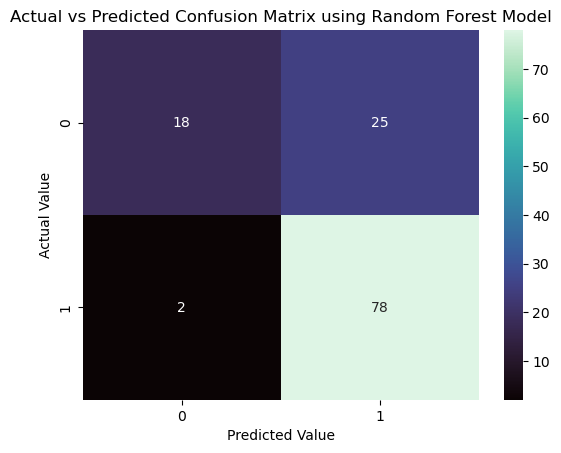

In [102]:

cm = confusion_matrix(y_test,y_pred)

plt.title('Actual vs Predicted Confusion Matrix using Random Forest Model')
sns.heatmap(cm,annot = True,cmap='mako')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()

### Step 5.6 : Ensemble Boosting technique: Adaboost, Gradientboost, XGboost

In [104]:
# Adaboost: Adaptive Boosting
# Gradientboost: GBM
# LBM: Gradientboost: LGBM
# XGboost: Extreme Gradient Boosting: 
# Catboost: Categorical: textual data: 

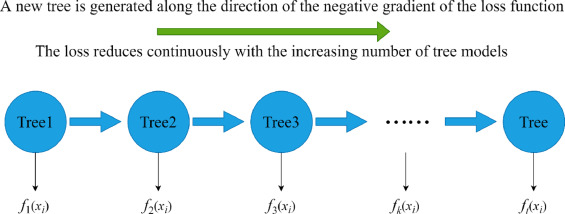

In [105]:
from xgboost import XGBClassifier

model_xgb = XGBClassifier() # Hyperparameters: Model Fine tune  objective="binary:logistic", random_state=42, learning_rate = 0.001
model_xgb.fit(X_train,y_train)  # NONE: Hyperparameters: Model Fine tune

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [106]:
y_pred = model_xgb.predict(X_test)

In [107]:
xgb_score = accuracy_score(y_test,y_pred)
xgb_score

0.7479674796747967

### Step 5.7 : KNN

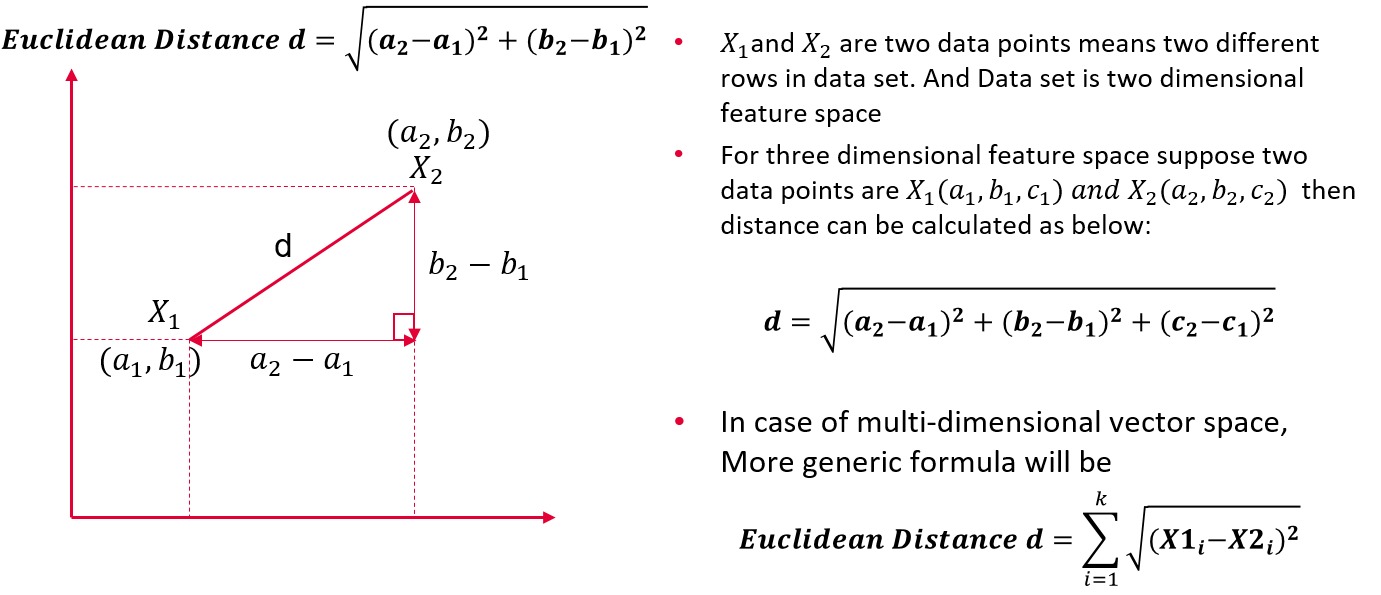

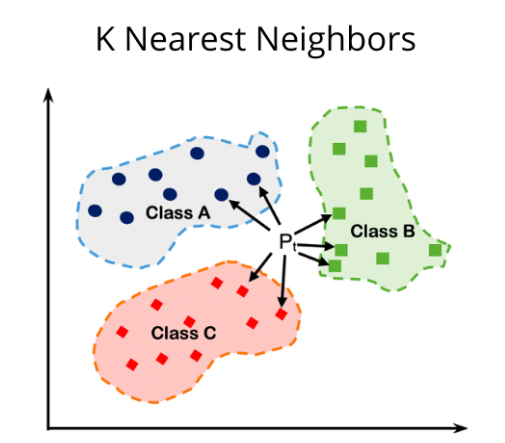

In [108]:
from sklearn.neighbors import KNeighborsClassifier

In [110]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier

pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),   # fill NaN
    ("knn", KNeighborsClassifier(n_neighbors=14))
])

pipeline.fit(X_train, y_train)

# No NaN issues anymore
y_pred = pipeline.predict(X_test)
score = pipeline.score(X_test, y_test)

print("Accuracy:", score)

Accuracy: 0.5853658536585366


In [113]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier

# Build pipeline
pipeline_knn = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),   # fill NaN with column mean
    ("knn", KNeighborsClassifier(n_neighbors=14))  # KNN model
])

# Fit pipeline on training data
pipeline_knn.fit(X_train, y_train)

# Predict
y_pred = pipeline_knn.predict(X_test)

# Evaluate
score = pipeline_knn.score(X_test, y_test)
print("Accuracy:", score)

Accuracy: 0.5853658536585366


In [114]:
knn_score = accuracy_score(y_test,y_pred)
knn_score

0.5853658536585366

In [115]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.25      0.09      0.14        43
           1       0.64      0.85      0.73        80

    accuracy                           0.59       123
   macro avg       0.44      0.47      0.43       123
weighted avg       0.50      0.59      0.52       123



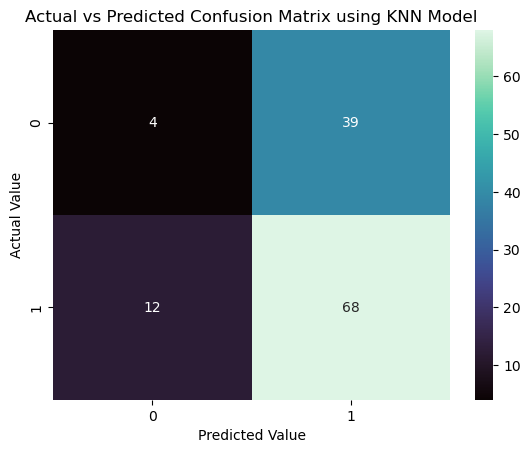

In [116]:
cm = confusion_matrix(y_test,y_pred)

plt.title('Actual vs Predicted Confusion Matrix using KNN Model')
sns.heatmap(cm,annot = True,cmap='mako')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()

### Step 5.8 : ANN

In [121]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Build ANN
model_ann = Sequential()
model_ann.add(Dense(units=32, activation='relu', input_shape=(X_train.shape[1],)))  # <-- use correct input dim
model_ann.add(Dense(units=16, activation='relu'))
model_ann.add(Dense(units=1, activation='sigmoid'))  # for binary classification

# Compile
model_ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit
model_ann.fit(X_train, y_train, epochs=300, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.6701 - loss: 15.5889 - val_accuracy: 0.6504 - val_loss: 0.6888
Epoch 2/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6965 - loss: 0.6849 - val_accuracy: 0.6504 - val_loss: 0.6846
Epoch 3/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6965 - loss: 0.6795 - val_accuracy: 0.6504 - val_loss: 0.6806
Epoch 4/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6965 - loss: 0.6741 - val_accuracy: 0.6504 - val_loss: 0.6769
Epoch 5/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6965 - loss: 0.6692 - val_accuracy: 0.6504 - val_loss: 0.6734
Epoch 6/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6965 - loss: 0.6643 - val_accuracy: 0.6504 - val_loss: 0.6704
Epoch 7/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6965 - loss: 0.6601 - val_accuracy: 0.6504 - val_loss: 0.6673
Epoch 8/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6965 - loss: 0.6561 - val_accuracy: 0.65

In [124]:
model_ann.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [125]:
print(X_train.shape)

(491, 19)


In [126]:


y_pred = model_ann.predict(X_test)
y_pred  = [round(i[0]) for i in  y_pred]
print(y_pred)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step 
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [127]:
ann_score = accuracy_score(y_test,y_pred)
ann_score

0.6504065040650406

# Step 6 : All models comparison

In [128]:
all_model_score  = [lr_score,nv_score,svm_score,dt_score,rf_score,xgb_score,knn_score,ann_score]
model_name = ['Logistic','Naive','SVM','Decision Tree','Random Forest','XGB','Knn','ANN']

print('Done')

Done


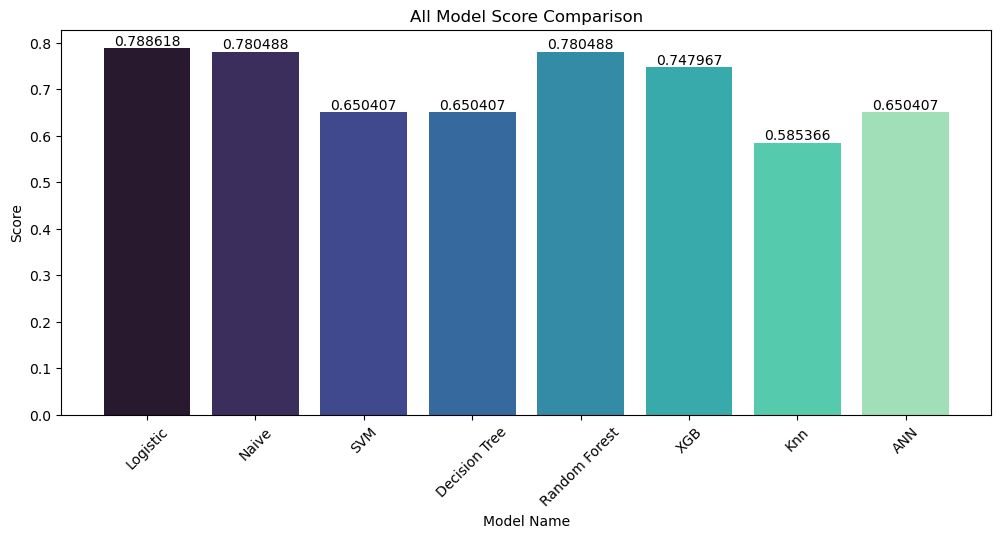

In [129]:
plt.figure(figsize=(12,5))
plt.title('All Model Score Comparison')
ax = plt.bar(x = model_name, height= all_model_score,color = sns.color_palette('mako',8))
plt.bar_label(ax)
plt.xlabel('Model Name')
plt.ylabel('Score')
plt.xticks(rotation = 45)
plt.show()

# Step 7 : Best Model Save

In [130]:
# lr has highest score so the Final Model is Logistic Regression

In [131]:
import pickle
with open('loan_pred.pkl','wb') as f:
    pickle.dump(model_lr,f)
print('Done')

Done
